 # Project: Accident data of Seattle city
 ### Applied Data Science Capstone

## Introduction
Accident data of Seattle city is considered for this project, where labeled data is already available and used for further analysis.

The attributes of the data set show different influence factors on accident probability, which will by analyzed in order to solve the problem to reduce the rate of accidents for the future. Furthermore, causes and circumstances that lead to larger accident probabilities are addressed as there are high correlations on different attributes observable. 

Using the outcome of the project, improvements on traffic factors may be done and additional caution may be given to dangerous situation or traffic constellations.

## Data
The labeled data in the first column describes the severity of the accidents, where different attributes are found on the remaining columns of the data set.

### Data Set Basics 
- Title: 	Collisions - All Years 
- Abstract: 	All collisions provided by SPD and recorded by Traffic Records. 
- Description:  	This includes all types of collisions. Collisions will display at the intersection or mid-block of a segment. Timeframe: 2004 to Present. 

|Attribute  | Data type, length  | Description |
| :----- | :----- | :----- |
|OBJECTID | ObjectID | ESRI unique identifier|
|SHAPE | Geometry | ESRI geometry field|
|INCKEY | Long | A unique key for the incident|
|COLDETKEY | Long | Secondary key for the incident|
|ADDRTYPE | Text, 12 | Collision address type: Alley, Block, Intersection|
|NTKEY | Double | Key that corresponds to the intersection associated with a collision|
|LOCATION | Text, 255 | Description of the general location of the collision|
|EXCEPTRSNCODE | Text, 10 |  |
|EXCEPTRSNDESC | Text, 300 |  |
|SEVERITYCODE | Text, 100 | A code that corresponds to the severity of the collision: 3—fatality, 2b—serious injury, 2—injury, 1—prop damage, 0—unknown|
|SEVERITYDESC | Text | A detailed description of the severity of the collision|
|COLLISIONTYPE | Text, 300 | Collision type|
|PERSONCOUNT | Double | The total number of people involved in the collision|
|PEDCOUNT | Double | The number of pedestrians involved in the collision. This is entered by the state.|
|PEDCYLCOUNT | Double | The number of bicycles involved in the collision. This is entered by the state.|
|VEHCOUNT | Double | The number of vehicles involved in the collision. This is entered by the state.|
|INJURIES | Double | The number of total injuries in the collision. This is entered by the state.|
|SERIOUSINJURIES | Double | The number of serious injuries in the collision. This is entered by the state.|
|FATALITIES | Double | The number of fatalities in the collision. This is entered by the state.|
|INCDATE | Date | The date of the incident.|
|INCDTTM | Text, 30 | The date and time of the incident.|
|JUNCTIONTYPE | Text, 300 | Category of junction at which collision took place|
|SDOT_COLCODE | Text, 10 | A code given to the collision by SDOT.|
|SDOT_COLDESC | Text, 300 | A description of the collision corresponding to the collision code.|
|INATTENTIONIND | Text, 1 | Whether or not collision was due to inattention. (Y/N)|
|UNDERINFL | Text, 10 | Whether or not a driver involved was under the influence of drugs or alcohol.|
|WEATHER | Text, 300 | A description of the weather conditions during the time of the collision.|
|ROADCOND | Text, 300 | The condition of the road during the collision.|
|LIGHTCOND | Text, 300 | The light conditions during the collision.|
|PEDROWNOTGRNT | Text, 1 | Whether or not the pedestrian right of way was not granted. (Y/N)|
|SDOTCOLNUM | Text, 10 | A number given to the collision by SDOT.|
|SPEEDING | Text, 1 | Whether or not speeding was a factor in the collision. (Y/N)|
|ST_COLCODE | Text, 10 | A code provided by the state that describes the collision. For more information about these codes, please see the State Collision Code Dictionary.|
|ST_COLDESC | Text, 300 | A description that corresponds to the state’s coding designation.|
|SEGLANEKEY | Long | A key for the lane segment in which the collision occurred.|
|CROSSWALKKEY | Long | A key for the crosswalk at which the collision occurred.|
|HITPARKEDCAR | Text, 1 | Whether or not the collision involved hitting a parked car. (Y/N)|


## Repository
- Link to Github repository: https://github.com/Guinn808/Coursera_Capstone  
- Notebook: https://github.com/Guinn808/Coursera_Capstone/blob/master/Coursera_Capstone.ipynb
- Data: https://github.com/Guinn808/Coursera_Capstone/blob/master/Data-Collisions.rar
- Metadata: https://github.com/Guinn808/Coursera_Capstone/blob/master/Metadata.pdf

# Data Preparation

The data set is loaded from csv and preprocessed in order to replace any mismatching attribute.

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.model_selection import train_test_split


df = pd.read_csv("C:/Users/Nickel/Downloads/Data-Collisions.csv")
print("Dataset downloaded and read into a pandas dataframe!")
print("\nData Shape: ",df.shape)
print("\nMore data info:")
print(df.head())
print(df.info())
print("\nStatistics:")
print(df.describe(include="all"))


data_sel = df[["WEATHER","SPEEDING","LIGHTCOND","ROADCOND","JUNCTIONTYPE","PERSONCOUNT","VEHCOUNT","SEVERITYCODE"]]
data_sel.head()
data_sel = data_sel[data_sel.WEATHER !="Unknown"]
data_sel = data_sel[data_sel.WEATHER !="Other"]
data_sel['WEATHER'].fillna(data_sel['WEATHER'].mode()[0], inplace=True)
print("\nWeather attributes:")
print(data_sel.WEATHER.value_counts(dropna=False))

data_sel['SPEEDING'] = data_sel['SPEEDING'].fillna('N')

data_sel = data_sel[data_sel.LIGHTCOND !="Unknown"]
data_sel = data_sel[data_sel.LIGHTCOND !="Other"]
data_sel['LIGHTCOND'].fillna(data_sel['LIGHTCOND'].mode()[0], inplace=True)
print("\nLight attributes:")
print(data_sel.LIGHTCOND.value_counts(dropna=False))

data_sel = data_sel[data_sel.ROADCOND !="Unknown"]
data_sel = data_sel[data_sel.ROADCOND !="Other"]
data_sel['ROADCOND'].fillna(data_sel['LIGHTCOND'].mode()[0], inplace=True)
print("\nRoad attributes:")
print(data_sel.ROADCOND.value_counts(dropna=False))

data_sel['SEVERITYCODE'].fillna(data_sel['SEVERITYCODE'].mode()[0], inplace=True)
print("\nSeverity attributes:")
print(data_sel.SEVERITYCODE.value_counts(dropna=False))

print("\nData types (before convertion):")
print(data_sel.info())
w_list = data_sel['WEATHER'].unique()
w_dict = dict(zip(w_list, range(len(w_list))))
s_list = data_sel['SPEEDING'].unique()
s_dict = dict(zip(s_list, range(len(s_list))))
l_list = data_sel['LIGHTCOND'].unique()
l_dict = dict(zip(l_list, range(len(l_list))))
r_list = data_sel['ROADCOND'].unique()
r_dict = dict(zip(r_list, range(len(r_list))))
j_list = data_sel['JUNCTIONTYPE'].unique()
j_dict = dict(zip(j_list, range(len(j_list))))
data_sel = data_sel.replace({'WEATHER': w_dict, 'SPEEDING': s_dict, 'LIGHTCOND': l_dict, 'ROADCOND': r_dict, 'JUNCTIONTYPE': j_dict})
print("\nData types (after convertion to integer):")
print(data_sel.info())




C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Dataset downloaded and read into a pandas dataframe!

Data Shape:  (194673, 38)

More data info:
   SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO  \
0             2 -122.323148  47.703140         1    1307       1307  3502005   
1             1 -122.347294  47.647172         2   52200      52200  2607959   
2             1 -122.334540  47.607871         3   26700      26700  1482393   
3             1 -122.334803  47.604803         4    1144       1144  3503937   
4             2 -122.306426  47.545739         5   17700      17700  1807429   

    STATUS      ADDRTYPE   INTKEY      ...      ROADCOND  \
0  Matched  Intersection  37475.0      ...           Wet   
1  Matched         Block      NaN      ...           Wet   
2  Matched         Block      NaN      ...           Dry   
3  Matched         Block      NaN      ...           Dry   
4  Matched  Intersection  34387.0      ...           Wet   

                 LIGHTCOND PEDROWNOTGRNT  SDOTCOLNUM SPEEDING


Road attributes:
Dry               121692
Wet                46378
Daylight            4995
Ice                 1083
Snow/Slush           837
Standing Water       105
Sand/Mud/Dirt         66
Oil                   60
Name: ROADCOND, dtype: int64

Severity attributes:
1    118401
2     56815
Name: SEVERITYCODE, dtype: int64

Data types (before convertion):
<class 'pandas.core.frame.DataFrame'>
Int64Index: 175216 entries, 0 to 194672
Data columns (total 8 columns):
WEATHER         175216 non-null object
SPEEDING        175216 non-null object
LIGHTCOND       175216 non-null object
ROADCOND        175216 non-null object
JUNCTIONTYPE    172571 non-null object
PERSONCOUNT     175216 non-null int64
VEHCOUNT        175216 non-null int64
SEVERITYCODE    175216 non-null int64
dtypes: int64(3), object(5)
memory usage: 12.0+ MB
None

Data types (after convertion to integer):
<class 'pandas.core.frame.DataFrame'>
Int64Index: 175216 entries, 0 to 194672
Data columns (total 8 columns):
WEATHER      

# Data Selection and Evalutation
Specific data attributes (e.g. weather conditions and speeding) are selected for prediction of severity of accidents.

## K Nearest Neighbor(KNN) 
First, the value of K is optimized and the accuracy is determined.


SHAPE 1:  (118401, 8)
SHAPE 2:  (56815, 8)

Shape after resampling:  (20000, 8)

Data info:
   WEATHER  SPEEDING  LIGHTCOND  ROADCOND  JUNCTIONTYPE  PERSONCOUNT  \
0        2         0          1         1             1            2   
1        0         0          1         0             0            2   
2        1         1          0         0             0            3   
3        2         0          0         1             1            2   
4        1         1          3         0             1            1   

   VEHCOUNT  SEVERITYCODE  
0         2             1  
1         2             1  
2         2             1  
3         2             1  
4         1             1  
Train set: (14000, 2) (14000,)
Test set: (6000, 2) (6000,)
Train set Accuracy:  0.513
Test set Accuracy:  0.513


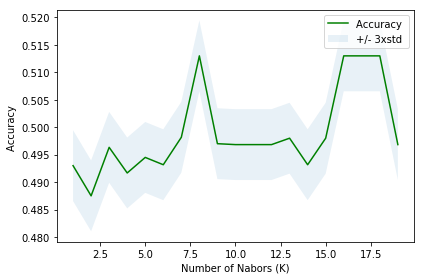

The best accuracy was with 0.513 with k= 8


In [4]:
x = data_sel[["WEATHER","SPEEDING","LIGHTCOND","ROADCOND","JUNCTIONTYPE","PERSONCOUNT","VEHCOUNT"]].values
y = data_sel[["SEVERITYCODE"]].values

sev_1 = data_sel[data_sel.SEVERITYCODE == 1]
sev_2 = data_sel[data_sel.SEVERITYCODE == 2]
print("\nSHAPE 1: ",sev_1.shape)
print("SHAPE 2: ",sev_2.shape)

sev_max =min([sev_1.shape[0],10000])
sev_1_res = resample(sev_1,replace=True,n_samples=sev_max,random_state=17) 
sev_2_res = resample(sev_2,replace=True,n_samples=sev_max,random_state=17) 
data_sel_res = pd.concat([sev_1_res, sev_2_res])
data_sel_res.reset_index(inplace = True,drop=True) 
print("\nShape after resampling: ",data_sel_res.shape)
print("\nData info:")
print(data_sel_res.head())

featureNames = ["WEATHER","SPEEDING"]#,"LIGHTCOND","ROADCOND","JUNCTIONTYPE"]
X = data_sel_res[featureNames].values
Y = data_sel_res["SEVERITYCODE"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

# Severity as target variable

from sklearn.model_selection import train_test_split
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

from sklearn.neighbors import KNeighborsClassifier
k = 20
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
yhat = neigh.predict(x_test)

from sklearn import metrics
import matplotlib.pyplot as plt
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 



## Conclusion for K Nearest Neighbor(KNN)
It can be observed, that the optimization of K does not lead to significant improvements. The accuracy is always in the order of 50% (0.48-0.52) - this is NOT a good result w.r.t. using the selected attributes in order to predict the severity.

## Support Vector Machine (SVN)
In order to achieve better results, the SVN method is applied.

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           1       0.51      0.78      0.62      3015
           2       0.52      0.24      0.33      2985

   micro avg       0.51      0.51      0.51      6000
   macro avg       0.52      0.51      0.47      6000
weighted avg       0.52      0.51      0.47      6000

Confusion matrix, without normalization
[[2360  655]
 [2273  712]]


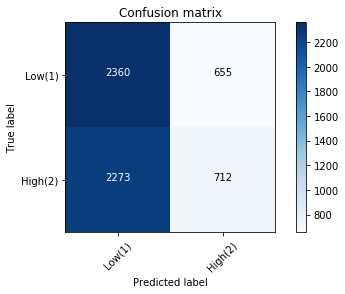

In [7]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train) 
yhat = clf.predict(x_test)
yhat [0:5]

from sklearn.metrics import classification_report, confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Low(1)','High(2)'],normalize= False,  title='Confusion matrix')

## Conclusion for SVN
Using SVN for estimation of severity, we observe a similar precision of about 0.51-0.52 for estimation of low-1 or high-2 severity. Nevertheless, the recall is much higher (0.78) for low-1 severity than for high-2 severity (0.24). The values show us, that it is NOT very good to predict the severity of an accident only given the state of the weather and the speeding. Due to the general larger occurany of low severity than high severity, it is right the way clear, that the recall is much larger for low severity.

# Conclusions
Using the existing dataset of the course, some remarkable insights have been obtained. At the beginning it was guessed, that the severity of an accident could be predicted by the weather or speeding conditions. Using different methods for estimation of the severity based on the existing dataset it could be observed, that only small amount of information can be gained by predictions.